## Homework 12

### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?


In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

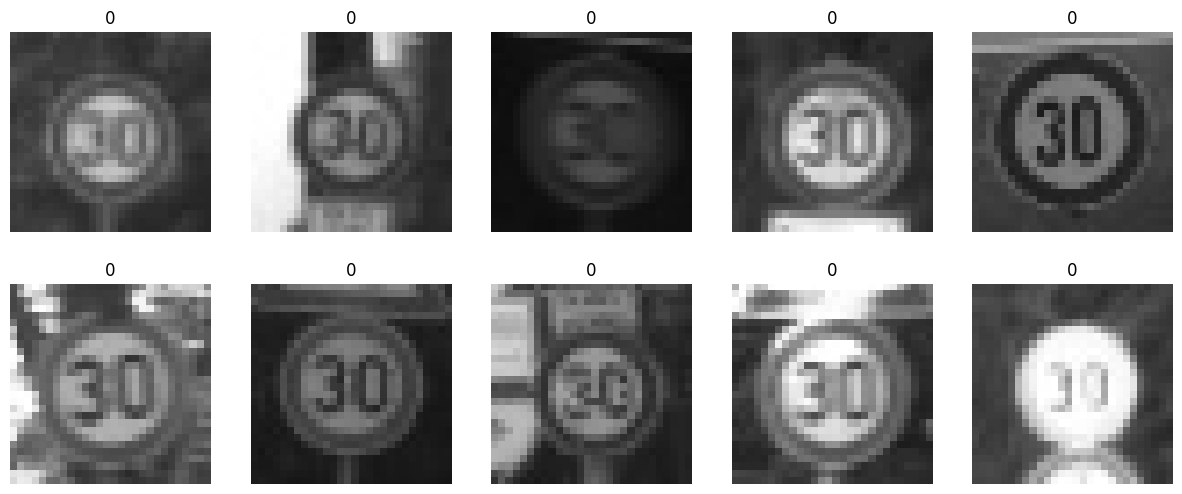

In [4]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

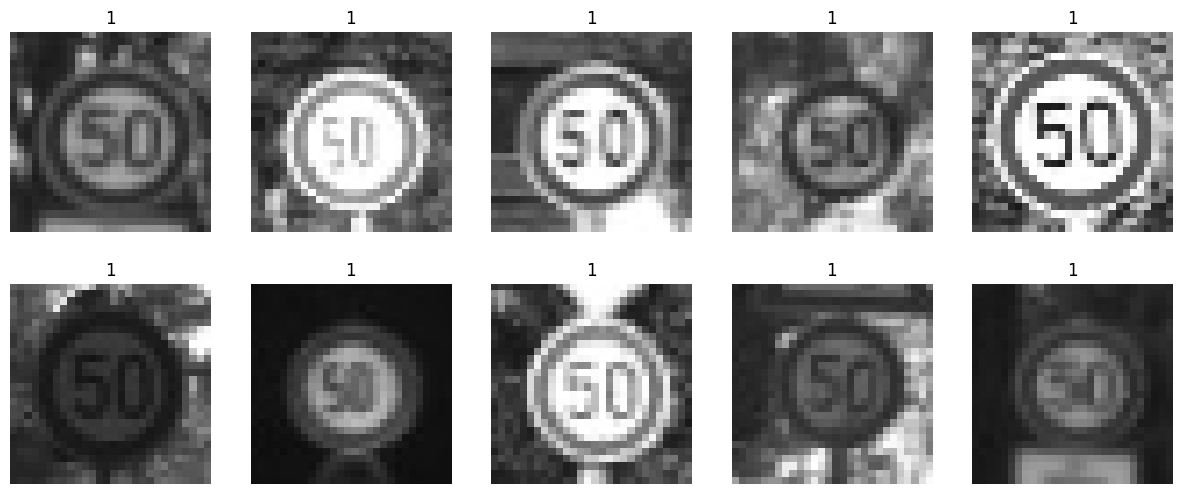

In [5]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [6]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

In [7]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

# Flatten the input
pixels = np.array([image.flatten() for image in images])/255

print('Images', images.shape)
print('Labels', labels.shape)
print('Pixels', pixels.shape)

Images (4470, 28, 28)
Labels (4470,)
Pixels (4470, 784)


#### Random samples

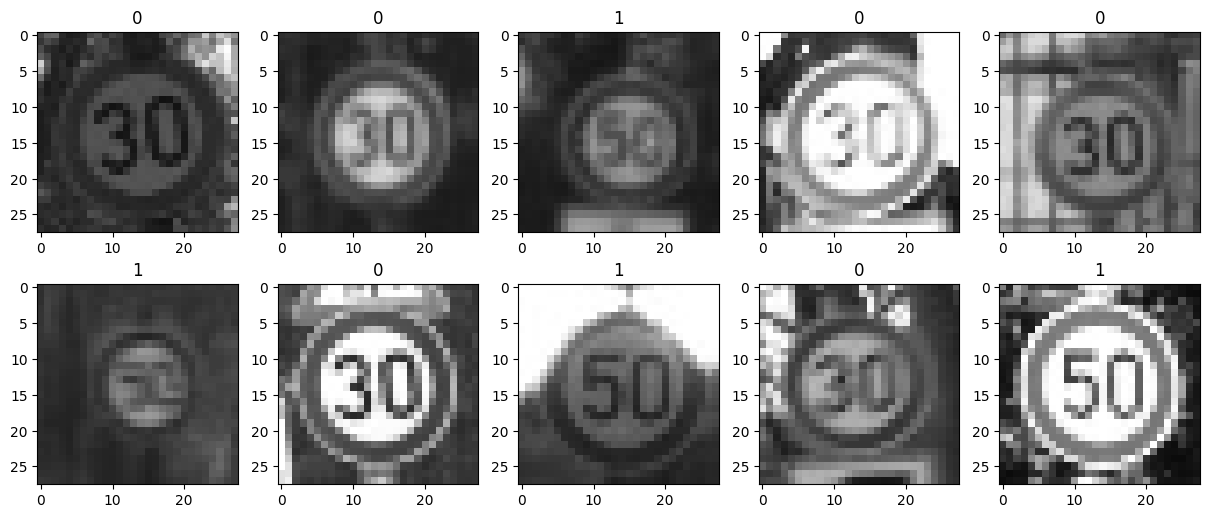

In [9]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building NN

In [24]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [32]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

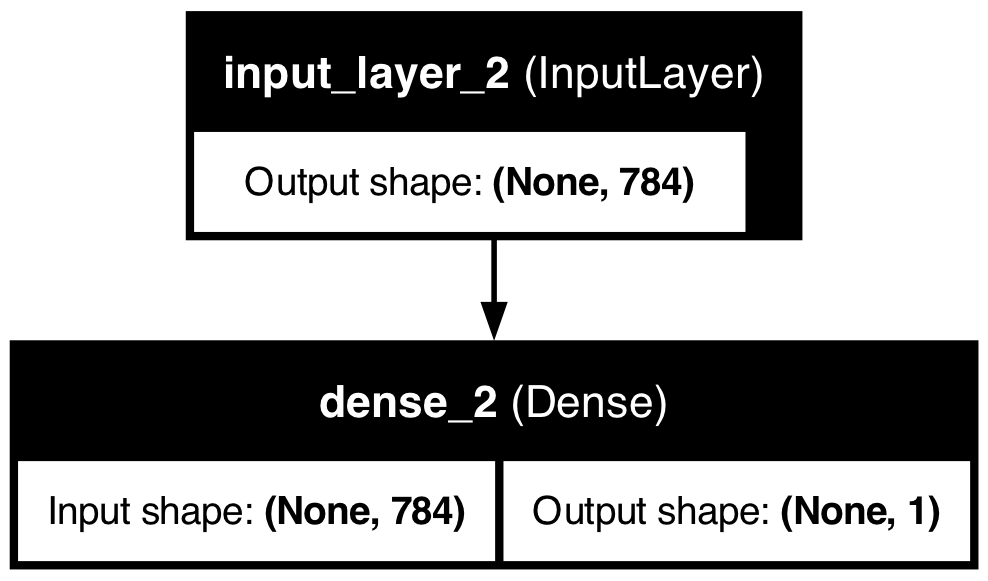

In [33]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [34]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')


In [35]:
history = model.fit(pixels, labels, epochs=100, batch_size=32)


Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.3661 
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.2222
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1939
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.1573
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.1408
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.1293
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.1197
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.1086
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.1023
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.0973
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.1001
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.0988
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.1059
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.0928
Epoch 15/100
1

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

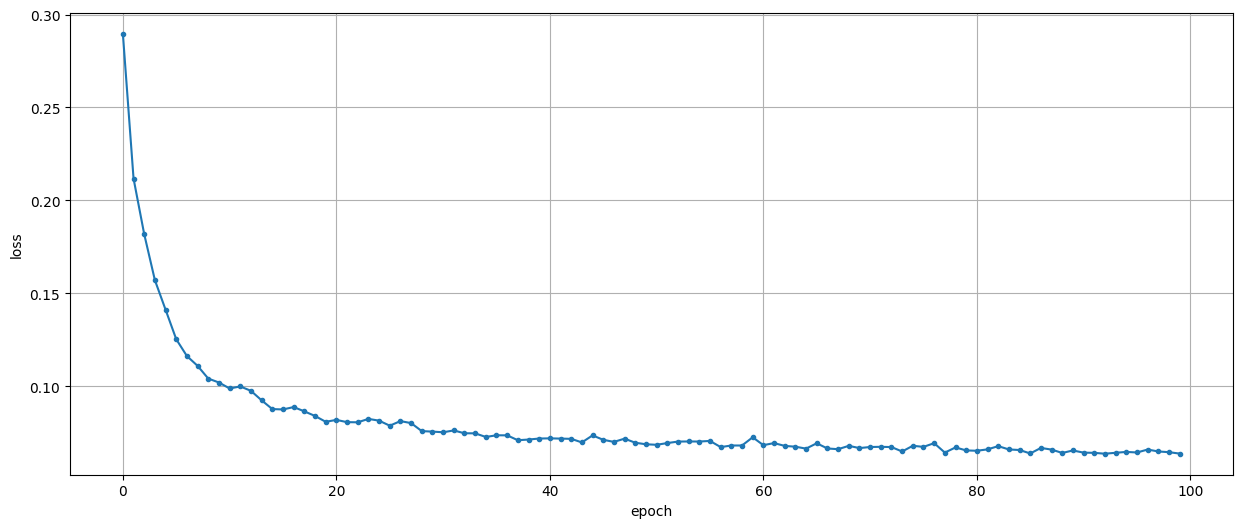

In [36]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [37]:
# Run the model on the entire dataset and assess its accuracy
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
Accuracy 0.9740492170022371


#### A: The accuracy is 97.40%

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?


In [46]:
# Now let's build more complex NN with 1 additional internal layer of 10 (100) neurons
inputs = Input(shape=(pixels.shape[1],))
net = Dense(100, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(net)
model = Model(inputs, outputs)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,601 (307.04 KB)

 Trainable params: 78,601 (307.04 KB)

 Non-trainable params: 0 (0.00 B)

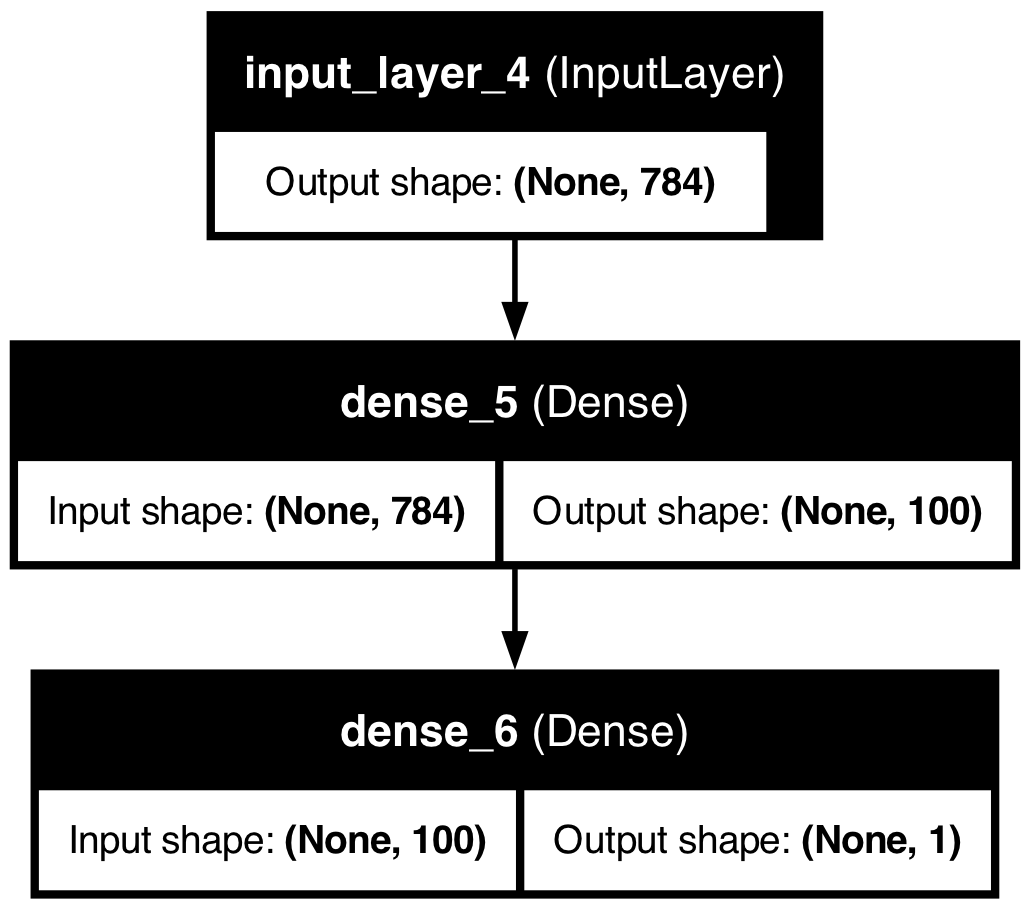

In [47]:
tf.keras.utils.plot_model(model, to_file="model2.png", show_shapes=True, show_layer_names=True)

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(pixels, labels, epochs=100, batch_size=32)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.4051
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.1765
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1239
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.1065
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0896
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.0850
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.0863
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.0858
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.0759
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.0740
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0827
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.0766
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.0640
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.0672
Epoch 15/100
14

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

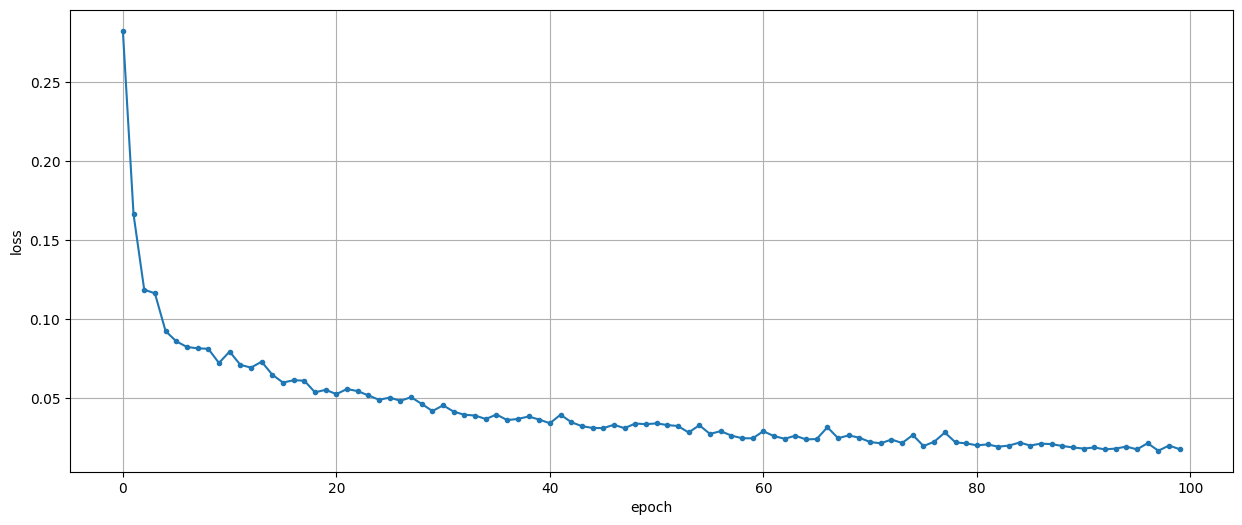

In [49]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [50]:
# Run the model on the entire dataset and assess its accuracy
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
Accuracy 0.9991051454138703


#### A: Adding the internal layer with 10 neurons increases the accuracy to 98.34%.
#### And increasing the number of neurons to 100 uplifts the accuracy to a staggering 99.91%